In [20]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tools import PersonKeypoints
from tools import draw_keypoints_on_picture

In [2]:
model = YOLO("models/yolov8n-pose.pt") 

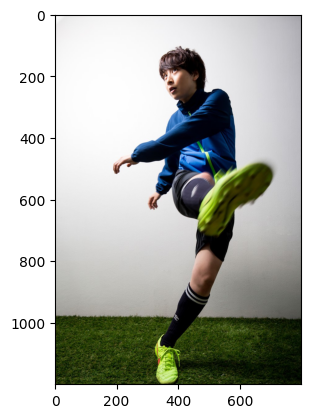

In [4]:
img_pic= np.array(Image.open("dataset\images\sample.jpg"))
plt.imshow(img_pic)

In [6]:
filepath_label = "dataset\labels\sample.txt"

In [8]:
def read_annotation_data(filepath_label):
    # filepath_labelを読み込み一人ごとにPersonKeypointsクラスのデータを作成
    with open(filepath_label, "r") as file:
        data = file.read()

    lines = data.split("\n")

    detected_persons = []

    for line in lines:
        data = line.split(" ")
        data = np.array(data, dtype="float32")
        class_id = int(data[0])
        box_xywhn = data[1:5]
        keypoints_xyvisib = data[5:].reshape(-1, 3)

        detected_persons.append(PersonKeypoints(class_id, box_xywhn, keypoints_xyvisib))
    
    return detected_persons

detected_persons = read_annotation_data(filepath_label)


In [9]:
img_keypoints = np.zeros(img_pic.shape, dtype="uint8")        

img_pic.shape

(1200, 800, 3)

In [19]:
person.keypoints_dict

{0: {'name': 'nose', 'xn': 0.46444, 'yn': 0.18414, 'visibility': 2},
 1: {'name': 'left_eye', 'xn': 0.49465, 'yn': 0.1644, 'visibility': 2},
 2: {'name': 'right_eye', 'xn': 0.44643, 'yn': 0.16656, 'visibility': 2},
 3: {'name': 'left_ear', 'xn': 0.57628, 'yn': 0.1612, 'visibility': 2},
 4: {'name': 'right_ear', 'xn': 0.0, 'yn': 0.0, 'visibility': 0},
 5: {'name': 'left_shoulder', 'xn': 0.63799, 'yn': 0.23103, 'visibility': 2},
 6: {'name': 'right_shoulder', 'xn': 0.50106, 'yn': 0.26867, 'visibility': 2},
 7: {'name': 'left_elbow', 'xn': 0.53803, 'yn': 0.30468, 'visibility': 2},
 8: {'name': 'right_elbow', 'xn': 0.48499, 'yn': 0.40999, 'visibility': 2},
 9: {'name': 'left_wrist', 'xn': 0.3504, 'yn': 0.36545, 'visibility': 2},
 10: {'name': 'right_wrist', 'xn': 0.4376, 'yn': 0.47877, 'visibility': 2},
 11: {'name': 'left_hip', 'xn': 0.69648, 'yn': 0.49553, 'visibility': 2},
 12: {'name': 'right_hip', 'xn': 0.60452, 'yn': 0.50152, 'visibility': 2},
 13: {'name': 'left_knee', 'xn': 0.57849

In [18]:
def generate_img_keypoints(img_pic, detected_persons):

    img_keypoints = np.zeros(img_pic.shape, dtype="uint8")        

    img_h, img_w, _ = img_pic.shape

    for person in detected_persons:
        xn, yn, wn, hn = person.box_xywhn
        left = int(round((xn-(wn/2))*img_w))
        right = int(round((xn+(wn/2))*img_w))
        top = int(round((yn-(hn/2))*img_h))
        bottom = int(round((yn+(hn/2))*img_h))
        cv2.rectangle(img_keypoints, (left, top), (right, bottom), (255,0,0), 1, 1)
        
        for xn, yn, v in person.keypoints_xyvisib:
            x = int(round(xn*img_w))
            y = int(round(yn*img_h))

            if v == 1:
                cv2.circle(img_keypoints, center=(x, y), radius=3, color=(255, 0, 0), thickness=1)
            elif v == 2:
                cv2.circle(img_keypoints, center=(x, y), radius=3, color=(255, 0, 0), thickness=-1)
    
    return img_keypoints


In [16]:
img_result = draw_keypoints_on_picture(img_pic, img_keypoints)

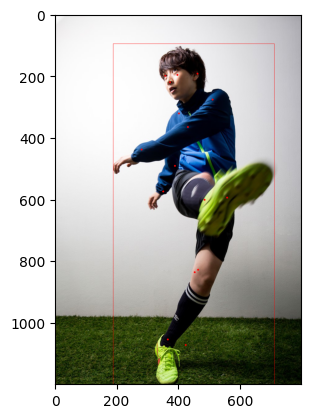

In [17]:
plt.imshow(img_result)

In [21]:
points = np.array(
    [[186, 110], [198, 99], [179, 100], [231, 97], [0, 0], [255, 139], [200, 161], [215, 183], [194, 246], [140, 219], [175, 287], [279, 297], [242, 301], [231, 415], [226, 419], [182, 527], [212, 537]]
)

points

array([[186, 110],
       [198,  99],
       [179, 100],
       [231,  97],
       [  0,   0],
       [255, 139],
       [200, 161],
       [215, 183],
       [194, 246],
       [140, 219],
       [175, 287],
       [279, 297],
       [242, 301],
       [231, 415],
       [226, 419],
       [182, 527],
       [212, 537]])

In [32]:
from scipy.spatial.distance import cdist

def find_nearest_coordinate(target_point, points):

    distances = cdist([target_point], points)

    # 最小距離のインデックスを取得
    nearest_idx = distances.argmin()

    # 最も近い座標データを取り出す
    return nearest_idx, points[nearest_idx]

points

In [26]:
points

array([[186, 110],
       [198,  99],
       [179, 100],
       [231,  97],
       [  0,   0],
       [255, 139],
       [200, 161],
       [215, 183],
       [194, 246],
       [140, 219],
       [175, 287],
       [279, 297],
       [242, 301],
       [231, 415],
       [226, 419],
       [182, 527],
       [212, 537]])

In [31]:
find_nearest_coordinate((230, 400), points )

array([231, 415])

In [11]:
person.keypoints_xyvisib

array([[    0.46444,     0.18414,           2],
       [    0.49465,      0.1644,           2],
       [    0.44643,     0.16656,           2],
       [    0.57628,      0.1612,           2],
       [          0,           0,           0],
       [    0.63799,     0.23103,           2],
       [    0.50106,     0.26867,           2],
       [    0.53803,     0.30468,           2],
       [    0.48499,     0.40999,           2],
       [     0.3504,     0.36545,           2],
       [     0.4376,     0.47877,           2],
       [    0.69648,     0.49553,           2],
       [    0.60452,     0.50152,           2],
       [    0.57849,     0.69122,           2],
       [    0.56459,     0.69759,           2],
       [    0.45614,     0.87909,           2],
       [    0.52914,     0.89427,           2]], dtype=float32)

In [ ]:
# Boxを描画
img_keypoints = np.zeros(img_pic.shape, dtype="uint8")        
for person in detected_persons:
    xn, yn, wn, hn = person.box_xywhn
    left = int(round((xn-(wn/2))*img_w))
    right = int(round((xn+(wn/2))*img_w))
    top = int(round((yn-(hn/2))*img_h))
    bottom = int(round((yn+(hn/2))*img_h))
    
    cv2.rectangle(img_keypoints, (left, top), (right, bottom), (255,0,0), 1, 1) 

In [108]:
results = model(img_pic)[0]
label_text = generate_label_text(results)
label_text


0: 640x448 2 persons, 131.6ms
Speed: 4.0ms preprocess, 131.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
2
0
[    0.50187     0.54125     0.52375      0.9175]
1
[     0.6025     0.52917        0.51     0.93167]


'aaaaa 0.50187 0.54125 0.52375 0.91750 0.46157 0.17831 2 0.49123 0.16028 2 0.44279 0.16174 2 0.56862 0.16401 2 0.44768 0.17010 2 0.63387 0.24217 2 0.49245 0.27459 2 0.55645 0.30867 2 0.48514 0.40294 2 0.36030 0.36736 2 0.43532 0.48002 2 0.67916 0.50669 2 0.58598 0.51024 2 0.58352 0.72458 2 0.56819 0.72688 2 0.45740 0.88211 2 0.53100 0.89456 2\naaaaa 0.60250 0.52917 0.51000 0.93167 0.48933 0.17497 2 0.51810 0.15850 2 0.46254 0.15818 2 0.58274 0.17442 2 0.45713 0.17508 2 0.65927 0.26823 2 0.50923 0.27551 2 0.67283 0.35090 2 0.48493 0.38163 2 0.55226 0.40116 2 0.41255 0.46292 2 0.69673 0.51865 2 0.60415 0.51251 2 0.60031 0.73185 2 0.57732 0.72180 2 0.45606 0.88695 2 0.51364 0.88505 2\n'

In [91]:
results.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.7976, 0.6496])
data: tensor([[1.9200e+02, 9.9000e+01, 6.1100e+02, 1.2000e+03, 7.9761e-01, 0.0000e+00],
        [2.7800e+02, 7.6000e+01, 6.8600e+02, 1.1940e+03, 6.4957e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1200, 800)
shape: torch.Size([2, 6])
xywh: tensor([[ 401.5000,  649.5000,  419.0000, 1101.0000],
        [ 482.0000,  635.0000,  408.0000, 1118.0000]])
xywhn: tensor([[0.5019, 0.5412, 0.5238, 0.9175],
        [0.6025, 0.5292, 0.5100, 0.9317]])
xyxy: tensor([[ 192.,   99.,  611., 1200.],
        [ 278.,   76.,  686., 1194.]])
xyxyn: tensor([[0.2400, 0.0825, 0.7638, 1.0000],
        [0.3475, 0.0633, 0.8575, 0.9950]])

In [105]:
generate_label_text(results)

2
0
[    0.50187     0.54125     0.52375      0.9175]
1
[     0.6025     0.52917        0.51     0.93167]


'aaaaa 0.60250 0.52917 0.51000 0.93167 0.48933 0.17497 2 0.51810 0.15850 2 0.46254 0.15818 2 0.58274 0.17442 2 0.45713 0.17508 2 0.65927 0.26823 2 0.50923 0.27551 2 0.67283 0.35090 2 0.48493 0.38163 2 0.55226 0.40116 2 0.41255 0.46292 2 0.69673 0.51865 2 0.60415 0.51251 2 0.60031 0.73185 2 0.57732 0.72180 2 0.45606 0.88695 2 0.51364 0.88505 2\n'

In [83]:
results.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.7976, 0.6496])
data: tensor([[1.9200e+02, 9.9000e+01, 6.1100e+02, 1.2000e+03, 7.9761e-01, 0.0000e+00],
        [2.7800e+02, 7.6000e+01, 6.8600e+02, 1.1940e+03, 6.4957e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1200, 800)
shape: torch.Size([2, 6])
xywh: tensor([[ 401.5000,  649.5000,  419.0000, 1101.0000],
        [ 482.0000,  635.0000,  408.0000, 1118.0000]])
xywhn: tensor([[0.5019, 0.5412, 0.5238, 0.9175],
        [0.6025, 0.5292, 0.5100, 0.9317]])
xyxy: tensor([[ 192.,   99.,  611., 1200.],
        [ 278.,   76.,  686., 1194.]])
xyxyn: tensor([[0.2400, 0.0825, 0.7638, 1.0000],
        [0.3475, 0.0633, 0.8575, 0.9950]])

In [84]:
num_detected_person = results.boxes.shape[0]
num_detected_person


2

In [106]:
def generate_label_text(results):
	num_detected_person = results.boxes.shape[0]
	print(num_detected_person)
	label_text = ""

	for i in range(num_detected_person):
		label_text += "0" # personのclass id
		
		box_data = results.boxes.xywhn[i].cpu().numpy()
		print(box_data)
		for data in box_data:
			label_text = label_text + f" {data:.5f}"
		
		xy_data = results.keypoints.xyn[i].cpu().numpy()
		conf_data = results.keypoints.conf[i].cpu().numpy()
		
		for (x, y), conf in zip(xy_data, conf_data):
			#print(x, y, conf)
			
			if x == 0 and y == 0:
				visibility = 0 # 写真の外
			elif conf < 0.5:
				visibility = 1 # 何かに隠れている
			else:
				visibility = 2 # 見えている
			
			label_text += f" {x:.5f} {y:.5f} {visibility}"
		
		if i < (num_detected_person-1):	
			label_text += "\n"

	return label_text


In [111]:
filepath_img = "dataset\images\sample.jpg"
dir_images, filename = os.path.split(filepath_img)
filename_body, _ = os.path.splitext(filename)
dataset_dir, _ = os.path.split(dir_images)
filepath_label = os.path.join(dataset_dir, "labels", filename_body+".txt")

print(filepath_img)
print(dir_images)
print(filename)
print(filename_body)
print(dataset_dir)
print(filepath_label)

dataset\images\sample.jpg
dataset\images
sample.jpg
sample
dataset
dataset\labels\sample.txt


In [144]:
class PersonKeypoints:
    def __init__(self, class_id, box_xywhn, keypoints_xyvisib):
        self.class_id = class_id
        self.box_xywhn = box_xywhn
        self.keypoints_xyvisib = keypoints_xyvisib
        self.keypoints_dict = {}
        self.keypoints_name_list = [
                        "nose",
                        "left_eye", "right_eye",
                        "left_ear", "right_ear",
                        "left_shoulder", "right_shoulder",
                        "left_elbow", "right_elbow",
                        "left_wrist", "right_wrist",
                        "left_hip", "right_hip",
                        "left_knee","right_knee",
                        "left_ankle", "right_ankle"
                        ]
        
        for i in range(17):
            self.keypoints_dict[i] = {
                "name":self.keypoints_name_list[i],
                "xn":self.keypoints_xyvisib[i][0],
                "yn":self.keypoints_xyvisib[i][1],
                "visibility":int(self.keypoints_xyvisib[i][2])
            }
    

In [147]:
with open(filepath_label, "r") as file:
    data = file.read()

lines = data.split("\n")
num_detected_person = len(lines)

detected_persons = []

for line in lines:
    data = line.split(" ")
    data = np.array(data, dtype="float32")
    class_id = int(data[0])
    box_xywhn = data[1:5]
    keypoints_xyvisib = data[5:].reshape(-1, 3)

    detected_persons.append(PersonKeypoints(class_id, box_xywhn, keypoints_xyvisib))
    
detected_persons

(56,)
[          0     0.50625     0.54167      0.5325     0.91667     0.46113     0.17857           2     0.49139      0.1604           2     0.44239     0.16174           2     0.56999     0.16435           2     0.44709      0.1702           2     0.63535     0.24198           2      0.4925     0.27486           2
     0.55834      0.3089           2     0.48577     0.40452           2     0.36045       0.367           2     0.43565       0.481           2     0.68054     0.50475           2     0.58637     0.50835           2     0.58396     0.72331           2     0.56755     0.72626           2     0.45556     0.88342
           2     0.52903     0.89739           2]
(56,)
[          0       0.605        0.53        0.52     0.93333     0.48871      0.1753           2     0.51848     0.15835           2     0.46092     0.15801           2      0.5847     0.17419           2     0.45392     0.17485           2     0.66046     0.26796           2     0.50778     0.27531           2

In [148]:
person1 = PersonKeypoints(class_id, box_xywhn, keypoints_xyvisib)
person1

In [142]:
person1.class_id

0

In [149]:
person1.box_xywhn

array([      0.605,        0.53,        0.52,     0.93333], dtype=float32)

In [146]:
person1.keypoints_dict

{0: {'name': 'nose', 'xn': 0.48871, 'yn': 0.1753, 'visibility': 2},
 1: {'name': 'left_eye', 'xn': 0.51848, 'yn': 0.15835, 'visibility': 2},
 2: {'name': 'right_eye', 'xn': 0.46092, 'yn': 0.15801, 'visibility': 2},
 3: {'name': 'left_ear', 'xn': 0.5847, 'yn': 0.17419, 'visibility': 2},
 4: {'name': 'right_ear', 'xn': 0.45392, 'yn': 0.17485, 'visibility': 2},
 5: {'name': 'left_shoulder', 'xn': 0.66046, 'yn': 0.26796, 'visibility': 2},
 6: {'name': 'right_shoulder', 'xn': 0.50778, 'yn': 0.27531, 'visibility': 2},
 7: {'name': 'left_elbow', 'xn': 0.67264, 'yn': 0.3522, 'visibility': 2},
 8: {'name': 'right_elbow', 'xn': 0.48506, 'yn': 0.38271, 'visibility': 2},
 9: {'name': 'left_wrist', 'xn': 0.54846, 'yn': 0.40276, 'visibility': 2},
 10: {'name': 'right_wrist', 'xn': 0.4141, 'yn': 0.46448, 'visibility': 2},
 11: {'name': 'left_hip', 'xn': 0.69872, 'yn': 0.51652, 'visibility': 2},
 12: {'name': 'right_hip', 'xn': 0.60406, 'yn': 0.51053, 'visibility': 2},
 13: {'name': 'left_knee', 'xn':

In [123]:
class_id = data[0]
xywhn = data[1:5]
keypoints_xyvisib = data[5:].reshape(-1, 3)

print(class_id)
print(xywhn)
print(keypoints_xyvisib)

0.0
[      0.605        0.53        0.52     0.93333]
[[    0.48871      0.1753           2]
 [    0.51848     0.15835           2]
 [    0.46092     0.15801           2]
 [     0.5847     0.17419           2]
 [    0.45392     0.17485           2]
 [    0.66046     0.26796           2]
 [    0.50778     0.27531           2]
 [    0.67264      0.3522           2]
 [    0.48506     0.38271           2]
 [    0.54846     0.40276           2]
 [     0.4141     0.46448           2]
 [    0.69872     0.51652           2]
 [    0.60406     0.51053           2]
 [     0.6021     0.73021           2]
 [    0.57814     0.72147           2]
 [    0.45478     0.88586           2]
 [    0.51224     0.88643           2]]


In [86]:
label_text = ""
for x in box_data:
    label_text = label_text + f" {x}"
label_text

' 0.5568749904632568 0.5400000214576721 0.643750011920929 0.9200000166893005'

In [61]:
# Sample array
arr = np.array([1, 2, 3.14])

# Convert the array to a string with spaces between elements
string_arr = np.array2string(arr, separator=' ')

# Print the string
print(string_arr)

[          1           2        3.14]


In [62]:
import numpy as np

# Sample array
arr = np.array([1, 2, 3.14])

# Convert the array to a string with spaces between elements
string_arr = np.array2string(arr, separator=' ').strip('[]')

# Print the string
print(string_arr)

          1           2        3.14


In [63]:
len(string_arr)

35

In [60]:
a = box_data.tolist()
a


[0.5568749904632568, 0.5400000214576721, 0.643750011920929, 0.9200000166893005]

In [56]:
array = np.array([1, 2, 3, 4, 5])

# Convert the array to a string
array_string = np.array2string(array)
array_string

'[1 2 3 4 5]'

In [32]:
results.keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9898, 0.9779, 0.9133, 0.8944, 0.3695, 0.9889, 0.9946, 0.9600, 0.9811, 0.9634, 0.9814, 0.9943, 0.9968, 0.9805, 0.9890, 0.7265, 0.8093]])
data: tensor([[[3.7170e+02, 2.2171e+02, 9.8981e-01],
         [3.9556e+02, 1.9769e+02, 9.7790e-01],
         [3.5754e+02, 2.0109e+02, 9.1334e-01],
         [4.6108e+02, 1.9192e+02, 8.9437e-01],
         [0.0000e+00, 0.0000e+00, 3.6947e-01],
         [5.1117e+02, 2.7565e+02, 9.8891e-01],
         [4.0006e+02, 3.2194e+02, 9.9457e-01],
         [4.3191e+02, 3.6355e+02, 9.6004e-01],
         [3.8640e+02, 4.8995e+02, 9.8105e-01],
         [2.8432e+02, 4.3664e+02, 9.6338e-01],
         [3.4944e+02, 5.7164e+02, 9.8136e-01],
         [5.5337e+02, 5.9829e+02, 9.9433e-01],
         [4.7926e+02, 6.0600e+02, 9.9677e-01],
         [4.5814e+02, 8.3741e+02, 9.8048e-01],
         [4.4711e+02, 8.4521e+02, 9.8896e-01],
         [3.6828e+02, 1.0541e+03, 7.2648e-01],
         [4.2518e+02, 1.071

In [8]:
pose_detection(img_pic, model)


0: 640x448 1 person, 191.2ms
Speed: 0.0ms preprocess, 191.2ms inference, 1328.2ms postprocess per image at shape (1, 3, 640, 448)


(array([        188,          96,         703,        1200], dtype=float32),
 array([[      371.7,      221.71,     0.98981],
        [     395.56,      197.69,      0.9779],
        [     357.54,      201.09,     0.91334],
        [     461.08,      191.92,     0.89437],
        [          0,           0,     0.36947],
        [     511.17,      275.65,     0.98891],
        [     400.06,      321.94,     0.99457],
        [     431.91,      363.55,     0.96004],
        [      386.4,      489.95,     0.98105],
        [     284.32,      436.64,     0.96338],
        [     349.44,      571.64,     0.98136],
        [     553.37,      598.29,     0.99433],
        [     479.26,         606,     0.99677],
        [     458.14,      837.41,     0.98048],
        [     447.11,      845.21,     0.98896],
        [     368.28,      1054.1,     0.72648],
        [     425.18,        1071,     0.80928]], dtype=float32))

In [16]:
result = model(img_pic)


0: 640x448 1 person, 123.2ms
Speed: 1.8ms preprocess, 123.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
def pose_detection(img, model):
    result = model(img_pic)
    bbox_data = result[0].boxes.xyxy[0].cpu().numpy()
    keypoints_data = result[0].keypoints.data[0].cpu().numpy()
    return bbox_data, keypoints_data

In [35]:
result = model(img_pic)
bbox_data = result[0].boxes.xyxy.cpu().numpy()
keypoints_data = result[0].keypoints.data.cpu().numpy()


0: 640x448 1 person, 132.4ms
Speed: 1.2ms preprocess, 132.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


In [36]:
type(bbox_data)

numpy.ndarray

In [19]:
bbox_data[0]

array([        188,          96,         703,        1200], dtype=float32)

In [23]:
import cv2

result = model(img_pic)
bbox_data = result[0].boxes.xyxy.cpu().numpy()
keypoints_data = result[0].keypoints.data.cpu().numpy()

for i in range(len(bbox_data)):
    # draw bbox
    left, top, right, bottom = bbox_data[i]
    print(left, top, right, bottom)
    cv2.rectangle(img_pic, (left, top), (right, bottom), (255,0,0), 2, 1)


0: 640x448 1 person, 165.4ms
Speed: 5.0ms preprocess, 165.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)
188.0 97.0 703.0 1200.0


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [26]:
bbox_data.astype("int")

array([[ 188,   97,  703, 1200]])

In [30]:
keypoints_data[0]

array([[     372.07,      221.91,      0.9898],
       [     395.89,      197.94,     0.97784],
       [     357.86,      201.31,     0.91371],
       [     461.19,      192.17,     0.89401],
       [          0,           0,     0.37182],
       [      511.2,      275.88,     0.98889],
       [     400.16,      322.01,     0.99458],
       [     431.97,      363.76,     0.95994],
       [     386.48,      489.87,     0.98111],
       [     284.31,      436.73,     0.96326],
       [     349.53,      571.64,     0.98139],
       [     553.32,      598.26,     0.99433],
       [     479.26,       605.9,     0.99678],
       [     458.22,      837.41,      0.9805],
       [     447.23,      845.05,     0.98899],
       [     368.27,      1054.2,     0.72695],
       [     425.16,        1071,      0.8098]], dtype=float32)

In [32]:
points_dict = {
	1: {"label":"nose"},
	2: {"label":"left_eye"},
	3: {"label":"right_eye"},
	4: {"label":"left_ear"},
	5: {"label":"right_ear"},
	6: {"label":"left_shoulder"},
	7: {"label":"right_shoulder"},
	8: {"label":"left_elbow"},
	9: {"label":"right_elbow"},
	10: {"label":"left_wrist"},
	11: {"label":"right_wrist"},
	12: {"label":"left_hip"},
	13: {"label":"right_hip"},
	14: {"label":"left_knee"},
	15: {"label":"right_knee"},
	16: {"label":"left_ankle"},
	17: {"label":"right_ankle"}
	}

In [34]:
data = keypoints_data[i]

def generate_keypoints_dict(data):
	points_dict = {
		1: {"label":"nose"},
		2: {"label":"left_eye"},
		3: {"label":"right_eye"},
		4: {"label":"left_ear"},
		5: {"label":"right_ear"},
		6: {"label":"left_shoulder"},
		7: {"label":"right_shoulder"},
		8: {"label":"left_elbow"},
		9: {"label":"right_elbow"},
		10: {"label":"left_wrist"},
		11: {"label":"right_wrist"},
		12: {"label":"left_hip"},
		13: {"label":"right_hip"},
		14: {"label":"left_knee"},
		15: {"label":"right_knee"},
		16: {"label":"left_ankle"},
		17: {"label":"right_ankle"}
		}

	for i in range(17):
		x, y, conf = data[i]
		points_dict[i+1]["xy"]=(x, y)
		
		if x == 0 and y == 0:
			visibility = 0
		elif conf < 0.5:
			visibility = 1
		else:
			visibility = 2
		
		points_dict[i+1]["visibility"]= visibility

	return points_dict

NameError: name 'keypoints_data_' is not defined